In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from HOCMO import hocmo
import importlib

In [3]:
importlib.reload(hocmo)

<module 'HOCMO.hocmo' from '/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py'>

In [4]:
incidence_matrix,incidence_matrix_binary,protein_names,disease_names,gene_names,tensor = hocmo.createTensor('HOCMO_test.csv','CRs',5,5)

Size of the tensor: (5, 5, 5)


tensor size: (5, 5, 5)


/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:96: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, cmap='cm.coolwarm')


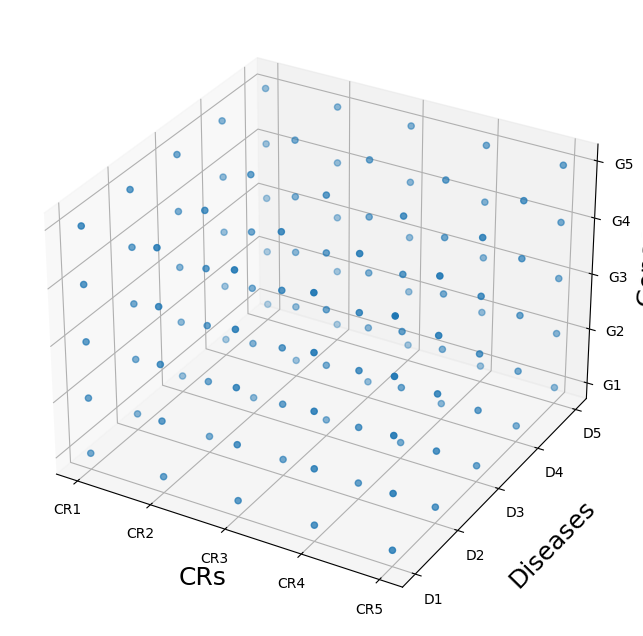

array([[[0.8894966 , 0.24431013, 0.97649195, 0.9319646 , 0.94539071],
        [0.24728567, 0.10842904, 0.18528397, 0.93951033, 0.37862826],
        [0.49790879, 0.34886467, 0.71324986, 0.85690116, 0.86238205],
        [0.95674425, 0.44423434, 0.72790213, 0.31252685, 0.33879375],
        [0.86652523, 0.40083206, 0.07311923, 0.90041889, 0.51105878]],

       [[0.41696817, 0.08903526, 0.70953601, 0.37787303, 0.36396489],
        [0.47594022, 0.86045558, 0.97985862, 0.61152541, 0.00152071],
        [0.93318536, 0.91280677, 0.13076751, 0.59804871, 0.8713225 ],
        [0.49171691, 0.84070258, 0.31553765, 0.92702822, 0.38850498],
        [0.61263533, 0.79837727, 0.58867055, 0.42980354, 0.90516288]],

       [[0.84253618, 0.74115325, 0.15274159, 0.99833939, 0.80439887],
        [0.9966027 , 0.62960701, 0.04867998, 0.21832862, 0.25400222],
        [0.48136462, 0.36220248, 0.59971559, 0.8761762 , 0.25692728],
        [0.50715526, 0.25985599, 0.75498626, 0.94109993, 0.92789119],
        [0.79505

<Figure size 640x480 with 0 Axes>

In [7]:
hocmo.basicVisual(tensor, 'CRs', 'Diseases', 'Genes', protein_names, disease_names,gene_names, './','test')

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:170: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(xs_average, ys_average, color="green", **linestyle, fmt='-')


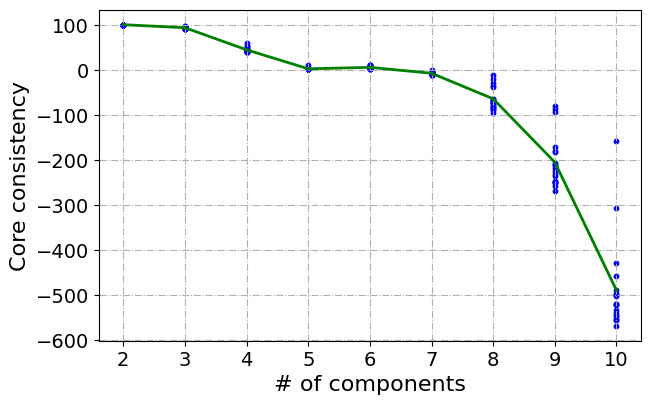

Number of K vs. Core consistency


2

In [8]:
component = hocmo.getCoreConsistency(tensor, "./core_consistency_rppa.png", iters = 100, num_k = 11, start =2, top_k=20)
component

In [5]:
component = 2 

In [6]:
hocmo.factorizeNCP(tensor, component)

TypeError: The numpy boolean negative, the `-` operator, is not supported, use the `~` operator or the logical_not function instead.

In [13]:
%pip install /workspaces/crewATLAS/HOCMO/HOCMO_package/dist/hocmo-0.0.5-py3-none-any.whl

Processing ./HOCMO_package/dist/hocmo-0.0.5-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [ ]:
PassSet

In [ ]:
(PassSet == None) or np.all(PassSet)